# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:

There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. 

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'espaces_verts_cleaned.csv'))

In [6]:
df.shape

(2301, 23)

### 2. Data Cleaning 

#### Translating and shortening column names

In [7]:
df.columns

Index(['Unnamed: 0', 'Identifiant espace vert', 'Nom de l'espace vert',
       'Typologie d'espace vert', 'Catégorie', 'Adresse - Numéro',
       'Adresse - Complément', 'Adresse - type voie', 'Adresse - Libellé voie',
       'Code postal', 'Surface calculée', 'Superficie totale réelle',
       'Surface horticole', 'Présence cloture', 'Périmètre',
       'Année de l'ouverture', 'Année de rénovation',
       'Ancien nom de l'espace vert', 'Année de changement de nom',
       'Nombre d'entités', 'Ouverture 24h_24h', 'Geo Shape', 'URL_PLAN'],
      dtype='object')

In [8]:
# Rename columns whose names are too long and translate to English

df.rename(columns = {'Identifiant espace vert' : 'ID', 'Nom de l\'espace vert' : 'Name', 
                     'Typologie d\'espace vert' : 'Type', 'Catégorie': 'Category',
                     'Adresse - Numéro': 'Street Number', 'Adresse - Complément' : 'Street Number Suffix', 
                     'Adresse - type voie' : 'Street Type', 'Adresse - Libellé voie' : 'Street Name', 
                     'Code postal' : 'Zip code', 'Surface calculée' : 'Calculated area', 
                     'Superficie totale réelle' : 'Actual total area', 'Surface horticole' : 'Horticultural area', 
                     'Présence cloture' : 'Enclosure', 'Périmètre' : 'Perimeter', 'Année de l\'ouverture' : 'Year opened', 
                     'Année de rénovation': 'Year renovated', 'Ancien nom de l\'espace vert' : 'Former name', 
                     'Année de changement de nom' : 'Year name changed', 'Nombre d\'entités' : 'Number of entities', 
                     'Ouverture 24h_24h' : 'Open 24hrs' },
                      inplace = True)

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Type', 'Category', 'Street Number',
       'Street Number Suffix', 'Street Type', 'Street Name', 'Zip code',
       'Calculated area', 'Actual total area', 'Horticultural area',
       'Enclosure', 'Perimeter', 'Year opened', 'Year renovated',
       'Former name', 'Year name changed', 'Number of entities', 'Open 24hrs',
       'Geo Shape', 'URL_PLAN'],
      dtype='object')

In [10]:
df.head()

,Unnamed: 0,ID,Name,Type,Category,Street Number,Street Number Suffix,Street Type,Street Name,Zip code,...,Enclosure,Perimeter,Year opened,Year renovated,Former name,Year name changed,Number of entities,Open 24hrs,Geo Shape,URL_PLAN
0,0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Décorations sur la voie publique,Jardiniere,39.0,NaN,QUAI DE LA,SEINE,75019.0,...,Non,30.737389,2011.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",http://p70-planet.apps.paris.mdp/Advitium/Appe...
1,1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Décorations sur la voie publique,Jardiniere,6.0,S,PLACE,RAOUL DAUTRY,75015.0,...,Non,312.718568,NaN,NaN,NaN,NaN,4.0,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",http://p70-planet.apps.paris.mdp/Advitium/Appe...
2,2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Décorations sur la voie publique,Jardiniere,47.0,NaN,RUE,BAUDRICOURT,75013.0,...,Non,80.353023,2005.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",http://p70-planet.apps.paris.mdp/Advitium/Appe...
3,3,219.0,JARDIN FRANCOISE GIROUD,Promenades ouvertes,Jardin,4.0,V,PLACE D,ITALIE,75013.0,...,Oui,245.468867,1878.0,2019.0,SQUARE DE LA PLACE D'ITALIE,2013.0,1.0,Oui,"{""coordinates"": [[[2.356129760906164, 48.83152...",http://p70-planet.apps.paris.mdp/Advitium/Appe...
4,4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Décorations sur la voie publique,Jardiniere,2.0,BIS V,PLACE,FRANZ LISTZ,75010.0,...,Non,52.677758,NaN,NaN,NaN,NaN,1.0,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",http://p70-planet.apps.paris.mdp/Advitium/Appe...


In [11]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                 0
ID                        68
Name                       2
Type                       4
Category                   3
Street Number              5
Street Number Suffix    1936
Street Type              250
Street Name              253
Zip code                   5
Calculated area          317
Actual total area        552
Horticultural area       606
Enclosure                 53
Perimeter                575
Year opened              732
Year renovated          2203
Former name             1793
Year name changed       2018
Number of entities        83
Open 24hrs              1446
Geo Shape                  5
URL_PLAN                  68
dtype: int64

In [12]:
# Remove Unnamed column

df.drop(columns=['Unnamed: 0'], inplace=True)

### 3. Exploring Relationships

### Correlations

#### Questions outlined for research:
    Number of green spaces (which neighborhoods have the most/least?)
    Type of green spaces (are there trends by neighborhoods?)
    Total green space surface area by neighborhood
    Percentage of green space surface area by neighborhood
    Proximity and accessibility of green spaces by neighborhood
#### Correlation matrix requires integer data types

In [13]:
# Creating a correlation matrix for specific columns

selected_columns = ['Zip code', 'Calculated area', 'Actual total area', 'Horticultural area', 'Perimeter', 'Year opened', 'Number of entities']
correlation_matrix_selected = df[selected_columns].corr()

correlation_matrix_selected


,Zip code,Calculated area,Actual total area,Horticultural area,Perimeter,Year opened,Number of entities
Zip code,1.000000,0.086919,0.584254,-0.001836,0.156238,-0.015371,-0.015412
Calculated area,0.086919,1.000000,0.994440,0.878436,0.813137,-0.026331,-0.013668
Actual total area,0.584254,0.994440,1.000000,0.853645,0.551118,-0.026484,-0.032215
Horticultural area,-0.001836,0.878436,0.853645,1.000000,0.596089,-0.036285,-0.035115
Perimeter,0.156238,0.813137,0.551118,0.596089,1.000000,-0.049855,0.121935
Year opened,-0.015371,-0.026331,-0.026484,-0.036285,-0.049855,1.000000,0.000667
Number of entities,-0.015412,-0.013668,-0.032215,-0.035115,0.121935,0.000667,1.000000


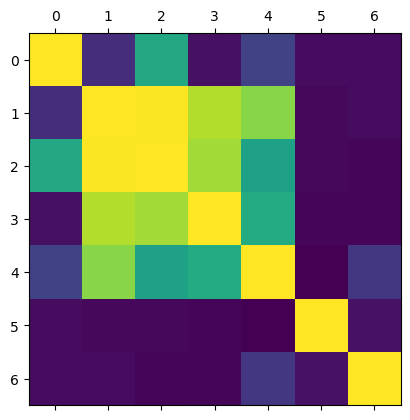

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(correlation_matrix_selected)
plt.show()

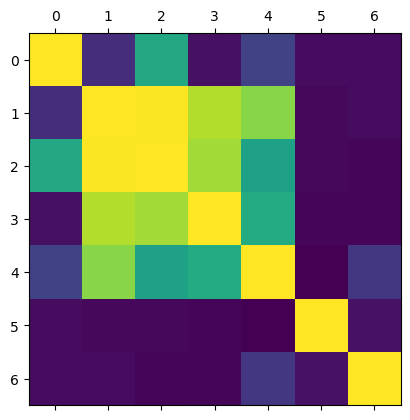

In [15]:
# Save figure
plt.matshow(correlation_matrix_selected)
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [16]:
#current dir
cwd = os.getcwd()
cwd

'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

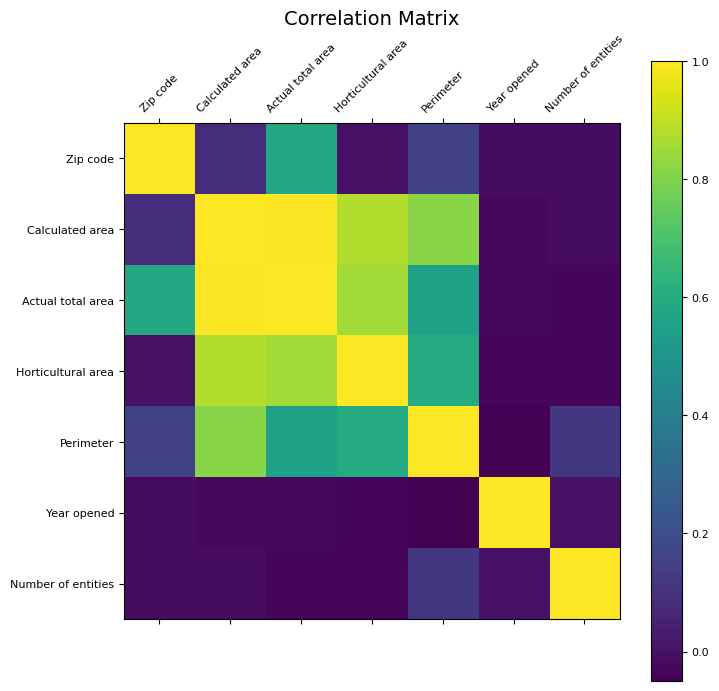

In [17]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(correlation_matrix_selected, fignum=f.number) # type of plot
plt.xticks(range(df[selected_columns].shape[1]), df[selected_columns].columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df[selected_columns].shape[1]), df[selected_columns].columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Interpretation: 
    Strongest correlation between calculated area, actual total area, horticultural areas and perimeter.
    Some correlation between zip code and actual total area.
    No correlations with year opened or number of entities.

#### Create a correlation heatmap using seaborn:

In [18]:
# Create a subset excluding the "Year opened" and "Number of entities" columns

sub = df[['Zip code', 'Calculated area', 'Actual total area', 'Horticultural area', 'Perimeter']]

In [19]:
sub

,Zip code,Calculated area,Actual total area,Horticultural area,Perimeter
0,75019.0,19.0,20.0,20.0,30.737389
1,75015.0,1312.0,1100.0,1100.0,312.718568
2,75013.0,58.0,56.0,56.0,80.353023
3,75013.0,5386.0,5400.0,2796.0,245.468867
4,75010.0,172.0,85.0,85.0,52.677758
...,...,...,...,...,...
2296,75009.0,NaN,NaN,NaN,NaN
2297,NaN,NaN,42.0,42.0,NaN
2298,75020.0,NaN,194.0,194.0,NaN
2299,75020.0,NaN,NaN,NaN,NaN


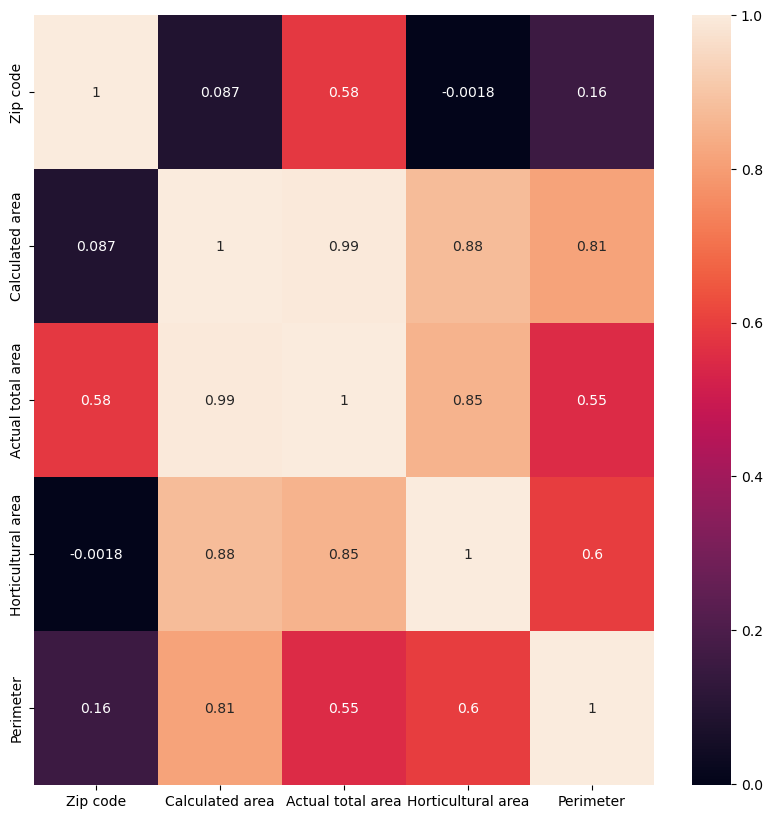

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap

#### Some correlation between zip code and actual total area.

### Scatterplots

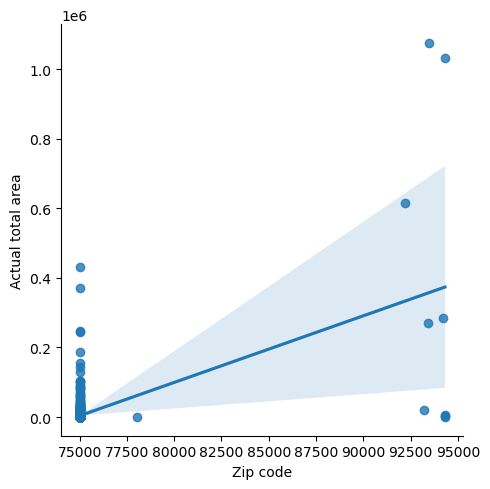

In [21]:
# Create a scatterplot for the "zip code" and "actual total area" columns in seaborn

sns.lmplot(x = 'Zip code', y = 'Actual total area', data = df)

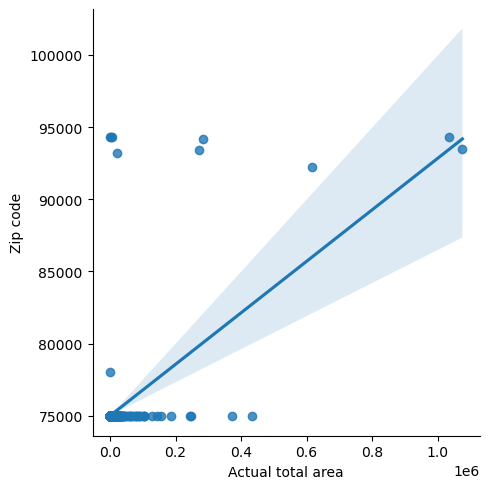

In [22]:
# Create a scatterplot for the "actual total area" and "zip code" columns in seaborn

sns.lmplot(x = 'Actual total area', y = 'Zip code', data = df)

### Conclusions 
    It makes sense that the largest areas correspond with higher zip code number because these are outside Paris' city limits.
### Performing the above operations again, this time filtering for zip codes beginning with "75" to show only green spaces located within Paris city limits (to exlude the surrounding Ile de France region).

### Correlations

In [23]:
# Filter the DataFrame for rows where Zip code begins with 75
filtered_df = df[df['Zip code'].astype(str).str.startswith('75')]

# Columns for correlation
selected_columns = ['Zip code', 'Calculated area', 'Actual total area', 'Horticultural area', 'Perimeter']

# Creating a correlation matrix for the specified columns in the filtered DataFrame
correlation_matrix_filtered = filtered_df[selected_columns].corr()

correlation_matrix_filtered


,Zip code,Calculated area,Actual total area,Horticultural area,Perimeter
Zip code,1.000000,0.002895,0.033690,0.049422,0.045972
Calculated area,0.002895,1.000000,0.975901,0.878436,0.811891
Actual total area,0.033690,0.975901,1.000000,0.853637,0.593579
Horticultural area,0.049422,0.878436,0.853637,1.000000,0.596089
Perimeter,0.045972,0.811891,0.593579,0.596089,1.000000


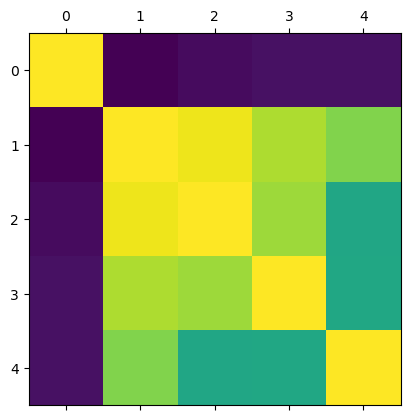

In [24]:
# Create a correlation heatmap using matplotlib

plt.matshow(correlation_matrix_filtered)
plt.show()

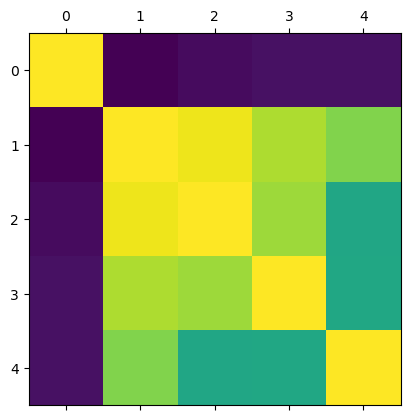

In [25]:
# Save figure
plt.matshow(correlation_matrix_filtered)
plt.savefig("out2.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

Text(0.5, 1.0, 'Paris 75 Correlation Matrix')

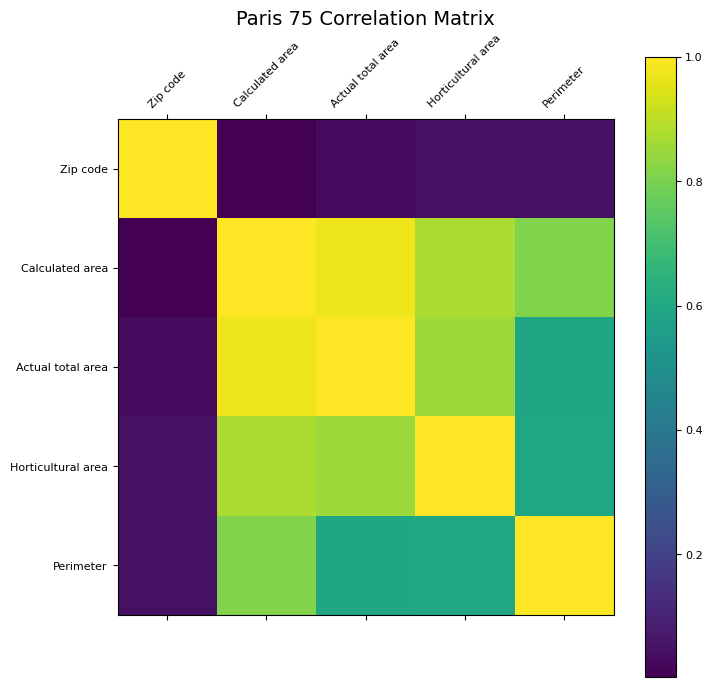

In [26]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(correlation_matrix_filtered, fignum=f.number) # type of plot
plt.xticks(range(filtered_df[selected_columns].shape[1]), filtered_df[selected_columns].columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(filtered_df[selected_columns].shape[1]), filtered_df[selected_columns].columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Paris 75 Correlation Matrix', fontsize=14) # add title

### Analyzing the correlation matrix for the specified columns in the dataset (considering only entries where the Zip code starts with '75'), we can identify some interesting correlations:

1. **Calculated Area and Actual Total Area (Correlation: 0.976):** There is a very strong positive correlation between 'Calculated area' and 'Actual total area'. This suggests that for most spaces, the calculated area is a good approximation of the actual total area.

2. **Calculated Area and Horticultural Area (Correlation: 0.878):** There is a strong positive correlation between 'Calculated area' and 'Horticultural area'. This indicates that larger spaces tend to have larger horticultural areas.

3. **Actual Total Area and Horticultural Area (Correlation: 0.854):** Similar to the correlation between calculated area and horticultural area, this strong positive correlation suggests that spaces with larger total areas also tend to have larger horticultural areas.

4. **Calculated Area and Perimeter (Correlation: 0.812):** There is a strong positive correlation between the size of an area (Calculated area) and its perimeter. Larger spaces naturally tend to have longer perimeters.

5. **Perimeter and Horticultural Area (Correlation: 0.596):** This moderate positive correlation suggests that spaces with larger perimeters tend to have larger horticultural areas, although the relationship is not as strong as with area measurements.

6. **Number of Entities and Perimeter (Correlation: 0.127):** There is a weak positive correlation between the 'Number of entities' and 'Perimeter'. This might imply that larger spaces may have a slightly higher number of entities, but the relationship is not very strong.

### Paris 75 correlation heatmap using seaborn.

In [27]:
# Create a subset 

sub2 = filtered_df[['Zip code', 'Calculated area', 'Actual total area', 'Horticultural area', 'Perimeter']]

In [28]:
sub2

,Zip code,Calculated area,Actual total area,Horticultural area,Perimeter
0,75019.0,19.0,20.0,20.0,30.737389
1,75015.0,1312.0,1100.0,1100.0,312.718568
2,75013.0,58.0,56.0,56.0,80.353023
3,75013.0,5386.0,5400.0,2796.0,245.468867
4,75010.0,172.0,85.0,85.0,52.677758
...,...,...,...,...,...
2295,75005.0,NaN,NaN,NaN,NaN
2296,75009.0,NaN,NaN,NaN,NaN
2298,75020.0,NaN,194.0,194.0,NaN
2299,75020.0,NaN,NaN,NaN,NaN


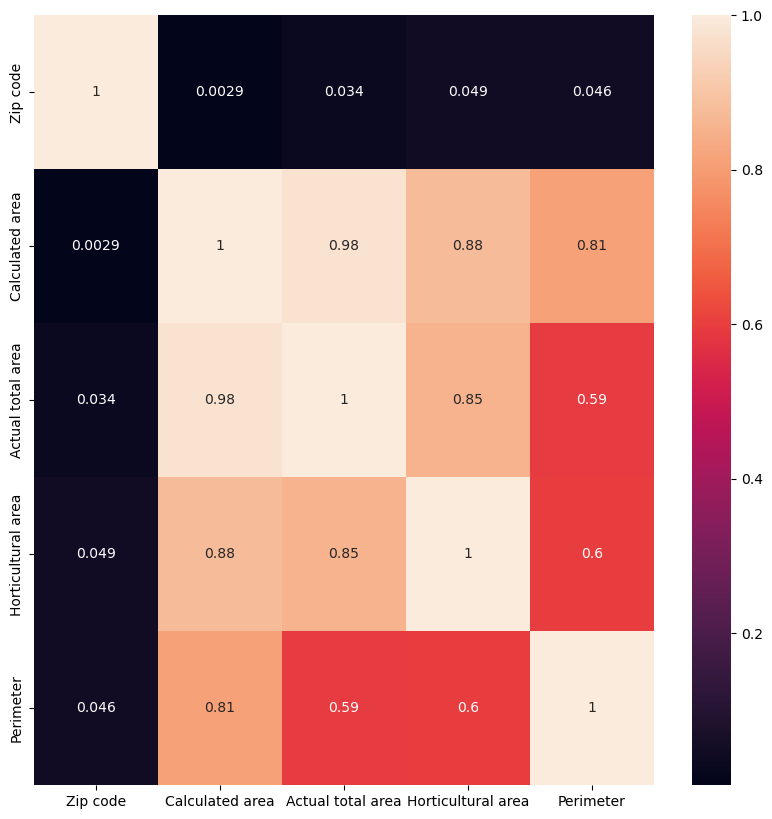

In [29]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub2.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap

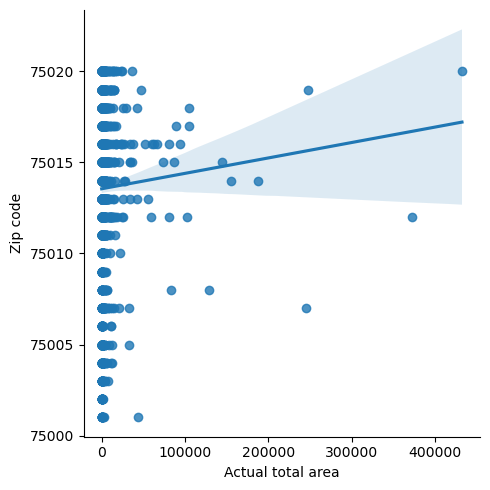

In [30]:
# Create a scatterplot for the "zip code" and "actual total area" columns in seaborn

sns.lmplot(x = 'Actual total area', y = 'Zip code', data = filtered_df)

#### The scatterplot above shows that most green spaces are relatively the same size throughout Paris, however the largest outliers are located in neighborhoods 75007, 75008, 75012, 75014, 75015, 75019, 75020.

### Pair Plots:

In [31]:
# Keep only the variables you want to use in the pair plot

sub_3 = sub2[['Zip code', 'Actual total area', 'Horticultural area']]

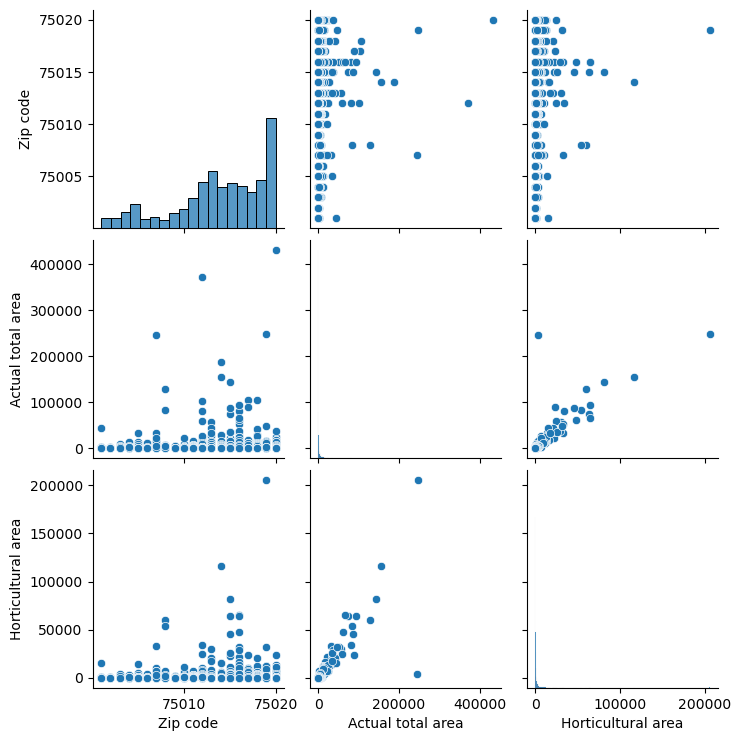

In [32]:
# Create a pair plot 

g = sns.pairplot(sub_3)

### Here we can see that horticultural area and actual total area tend to overlap, except when dealing with extremely large Actual total area outliers. 
### I'd like to further explore the sizes of the green spaces and compare this with the counts in each zip code.

### Categorical Plots:

#### Creating a categorical variable that splits the green space count by "Zip code" column into categories

<Axes: xlabel='Zip code', ylabel='Count'>

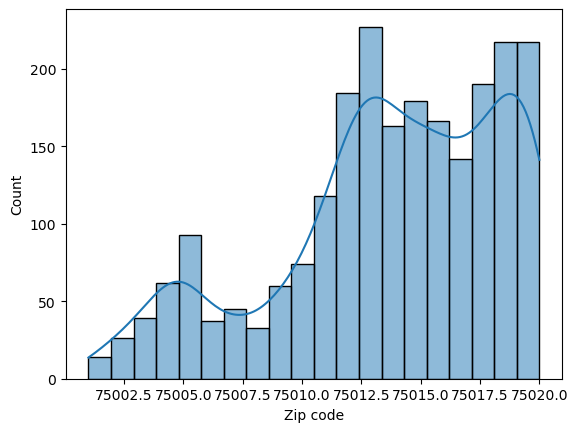

In [33]:
# Use a histogram to visualize the distribution of the variables. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" adds a line that encompasses the distribution

sns.histplot(filtered_df['Zip code'], bins = 20, kde = True)

### The histogram counts the number of green spaces in each zip code. More green spaces tend to be located in higher numbered zip codes.
    Below 50 = low number
    Above 50 and below 100 = average number
    Above 100 = high number
#### This green space count by zip code is useful information, however I do not want to categorize the zip codes themselves without further exploration. I will switch gears to categorize area instead.

#### Creating a categorical variable that splits Actual total area into categories

<Axes: xlabel='Actual total area', ylabel='Count'>

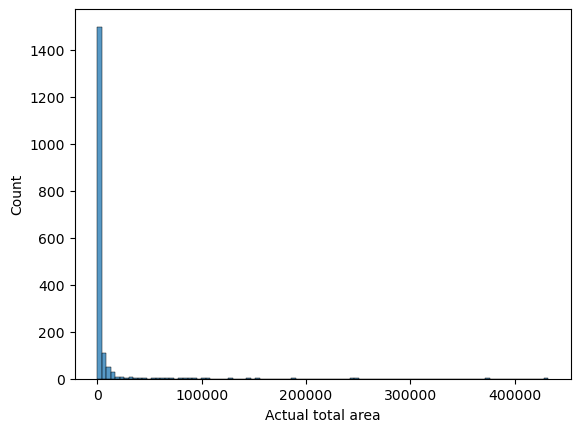

In [34]:
# Creating a histogram to visualize distribution of Actual total area

sns.histplot(filtered_df['Actual total area'], bins = 100)

In [35]:
filtered_df['Actual total area'].describe()

count      1738.000000
mean       3891.250288
std       19587.202995
min           0.000000
25%          92.000000
50%         365.500000
75%        1925.000000
max      432000.000000
Name: Actual total area, dtype: float64

#### As noted on the Paris Data website, "zero" values displayed in "Actual total area" correspond to embankments, green walls or planned green spaces for which the actual area is not (or not yet) calculated.

#### Defining Actual total area as follows:
    0 = green wall or embankment
    Above 0 and below 100 = small green space
    100 to 1000 = medium green space
    Above 1000 to 2000 = large green space
    Above 2000 = very large green space

In [36]:
# Exporting filtered_df

filtered_df.to_csv(os.path.join(path, '02 Data','Prepared_Data', 'espaces_verts_filtered_Paris75.csv'))

In [37]:
# Importing filtered_df to add categorical variable

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'espaces_verts_filtered_Paris75.csv'))

In [38]:
df.shape

(2286, 23)

In [39]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Type', 'Category', 'Street Number',
       'Street Number Suffix', 'Street Type', 'Street Name', 'Zip code',
       'Calculated area', 'Actual total area', 'Horticultural area',
       'Enclosure', 'Perimeter', 'Year opened', 'Year renovated',
       'Former name', 'Year name changed', 'Number of entities', 'Open 24hrs',
       'Geo Shape', 'URL_PLAN'],
      dtype='object')

In [40]:
df.loc[df['Actual total area'] == 0, 'Area category'] = 'Wall'

In [41]:
df.loc[(df['Actual total area'] > 0) & (df['Actual total area'] < 100), 'Area category'] = 'Small size'

In [42]:
df.loc[(df['Actual total area'] >= 100) & (df['Actual total area'] < 1000), 'Area category'] = 'Medium size'

In [43]:
df.loc[(df['Actual total area'] >= 1000) & (df['Actual total area'] < 2000), 'Area category'] = 'Large size'

In [44]:
df.loc[(df['Actual total area'] >= 2000), 'Area category'] = 'Very large size'

In [45]:
df['Area category'].value_counts(dropna = False)

Area category
Medium size        670
NaN                548
Small size         449
Very large size    427
Large size         189
Wall                 3
Name: count, dtype: int64

In [46]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Type', 'Category', 'Street Number',
       'Street Number Suffix', 'Street Type', 'Street Name', 'Zip code',
       'Calculated area', 'Actual total area', 'Horticultural area',
       'Enclosure', 'Perimeter', 'Year opened', 'Year renovated',
       'Former name', 'Year name changed', 'Number of entities', 'Open 24hrs',
       'Geo Shape', 'URL_PLAN', 'Area category'],
      dtype='object')

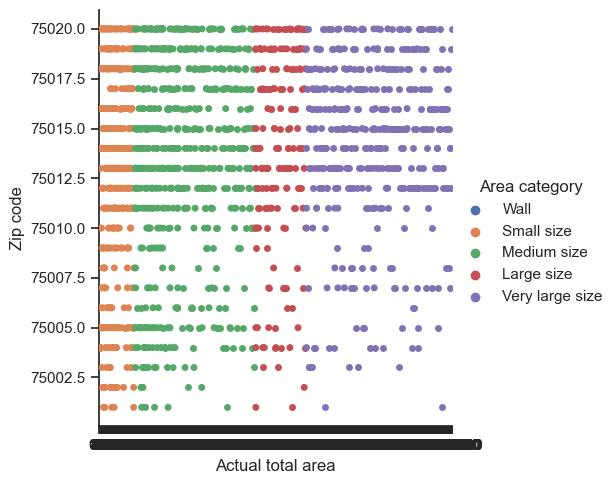

In [47]:
# Create a categorical plot in seaborn using the area categories created above

sns.set(style="ticks")
g = sns.catplot(x="Actual total area", y="Zip code", hue="Area category", data=df)

In [48]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

### Fewer and smaller green spaces are located in Paris center (lower number zip codes) compared to the outer neighborhoods (higher numbered zip codes) where much larger and more numerous green spaces can be found.
### Small-sized green spaces are plentiful throughout Paris. 

#### Research questions that have been answered in this exercise:
    Number of green spaces (which neighborhoods have the most/least?)
    Type of green spaces (are there trends by neighborhoods?)
    Total green space surface area by neighborhood
    Percentage of green space surface area by neighborhood
    Proximity and accessibility of green spaces by neighborhood

In [49]:
# Exporting file

df.to_csv(os.path.join(path, '02 Data','Prepared_Data', 'espaces_verts_75_updated.csv'))